# Случайные процессы. Практическое задание 4

* Дедлайн **31 октября 23:59** (9 дней на выполнение).
* Внимательно прочтите правила оформления. Задания, оформленные не по правилам, могут быть проигнорированы.
* Задание творческое, и некоторые параметры неопределены численно. Их нужно выбирать самостоятельно.
* В коде могут встречаться пропуски, которые обычно обозначаются так: <пояснение>

Это был обычный день в начале нового учебного года. Студент третьего курса ФИВТ Семен поужинал и лег спать. И вдруг во сне ему приснилось, что в курсе случайных процессов с этого года введена практика. А задания такие объемные, что даже условие одного задания занимает 3 страницы. Да и на его выполнение уходит не меньше недели по 5 часов в день. А еще они такие... непонятные, что приходится переспрашивать каждое предложение. 

Тут Семен понял, что так больше нельзя. И, сказав "Хватит это терпеть!", решил основать фонд страхования студентов. Страховыми случаями являются апатия, депрессия, отсутствие сна из-за бесконечной учебы и, наконец, очередное задание по случайным процессам с условием на три страницы. В качестве компенсации предлагалось выдавать несколько часов сна, просмотр кино, романтическую прогулку вдвоем, поход в лес, зажигательную ночь на дискотеке и, наконец, автоматический решатель очередного задания.

В качестве модели страхования Семен остановился на модели страхования Крамера-Лундберга. Однако, когда он начал в ней разбираться, он увидел слова "процесс восстановления" и расстроился. Семен понял, что случайные процессы в жизни везде и, сказав "Хватит это терпеть!", тут же проснулся и отправился готовиться к следующему занятию по случайным процессам. Как оказалось, практику по случайным процессам действительно ввели. Семен старался и занимался лучше всех. Правда, на экзамене попал к Игорю Владимировичу, который его успешно завалил.

---------------

### Часть 1

Давайте поможем Семену в его нелегком труде. На лекциях была (или будет) доказана теорема о вероятности разорения в модели страхования Крамера-Лундберга. Также этой теме был посвящен один семинар в 494 группе. Определим данную модель.
$$Y_t = y_0 + ct - \sum_{k=1}^{N_t} \eta_k,$$

- $t > 0$ --- время
- $y_0 > 0$ --- начальный капитал
- $c > 0$ --- скорость поступления страховых взносов
- $\eta_i$ --- случайное количество денег, которые придется выплатить при страховом случае
- $N_t$ --- количество выплат к моменту времени $t$
- $Y_t$ --- капитал в момент времени $t$

Случайные величины $\{\eta_i\}$ являются независимыми, одинаково распределенными, невырожденными и неотрицательными, а $N_t$ --- пуассоновский процесс интенсивности $\lambda$, не зависящий от $\eta_i$ $\forall i$.

Пусть $\tau = \inf\{t \left| Y_t < 0 \right.\}$ --- момент разорения. Если для любого $t > 0$ выполнено условие $\mathsf{E} Y_t > 0$, то теорема о вероятности разорения позволяет получит следующую оценку
$$\mathsf{P}(\tau < +\infty) = e^{-y_0 v_0},$$
где $v_0$ --- единственная точка из $(0, +\infty)$, для которой выполнено условие $g(v) = 0$, а функция $g(v) = \lambda \left(\mathsf{E} e^{v\eta_1} - 1\right) - cv$.

---------------

Будем считать, что случайные величины $\eta_i$ имеют дискретное распределение и принимают значения $a_1 / \theta, ..., a_s / \theta$ с вероятностями $p_1, ..., p_s$ соответственно.
Числа $a_1, ..., a_s$ будем считать заданными, а величина $\theta$ будет являться параметром модели.
Также будем считать, что параметр интенсивности пуассоновского процесса $\lambda$ задан.

Таким образом, в нашей модели три неизвестных параметра --- $y_0, c, \theta$.
Ясно, что увеличивая каждый из них, мы уменьшаем вероятность разорения.
Пользуясь экономическими терминами, введем функцию полезности $u(y_0, c, \theta) = 1 - \mathsf{P}^*(\tau < +\infty)$.
Смысл данной функции --- надежность модели.

**Вопрос:** Как выглядят кривые безразличия (линии уровня) данной функции?

как Величина, Обратная к экспоненте ($e^{-cx}, c > 0$)

Далее определены несколько функций, которые помогут вам при решении задачи.

In [1]:
import random
import gensim.matutils as gm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import numpy as np
from gensim import corpora, models
from tqdm import tqdm
from scipy.spatial.distance import cosine
from tqdm import tnrange as prange, tqdm_notebook as pbar
import copy
import sklearn
from sklearn.cross_validation import *
from collections import Counter
import pickle
import re
import pandas as pd
import scipy.stats as sps

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def find_root(function, x_min, x_max, tolerance=10 ** (-7)):
    ''' Находит корень уравнения function(x) = 0 
    для строго монотонной функции function 
    на отрезке [x_min, x_max] с точностью tolerance.
    '''
    
    f_min, f_max = function(x_min), function(x_max)
    if f_min * f_max > 0: return None  # Корня нет
    if f_min == 0: return x_min
    if f_max == 0: return x_max
    if f_max < f_min: function = lambda x: -function(x)
        
    x_avg = (x_min + x_max) / 2
    if x_max - x_min < tolerance: return x_avg
    
    if function(x_avg) > 0:
        return find_root(function, x_min, x_avg, tolerance)
    else:
        return find_root(function, x_avg, x_max, tolerance)

In [5]:
def find_root_segment(function, x_min=0, x_max=1, max_iter=100):
    ''' Находит отрезок, на котором находится корень уравнения function(x) = 0 
    для строго монотонной функции function, проводя не более max_iter итераций.
    Отрезок [x_min, x_max] используется в качетсве начального приближения.
    '''
    
    if max_iter == 0 or np.isinf(function(x_max)) \
        or function(x_min) * function(x_max) <= 0:
        return x_min, x_max
    else:
        return find_root_segment(function, x_max, 2 * x_max, max_iter - 1)

Ниже приведен пример задания функции $g(v)$ и функции для проверки корректности параметров для случая $\lambda = 1$, $\{a_1, a_2, a_3\} = \{1, 2, 3\}$ и $\{p_1, p_2, p_3\} = \{0.5, 0.3, 0.2\}$.
Вы можете использовать другие параметры.

In [43]:
values = np.array([1, 2, 3])
probs = np.array([0.5, 0.3, 0.2])
lambd = 1

def get_function_g(contributions_rate, price_multiplier):
    ''' Создает функцию g(v) для заданных скорости поступления страховых взносов 
    и ценового множителя страховых выплат, которая соответствует 
    теореме о вырождении в модели Крамера-Лундберга.
    '''
    
    def g(v):
        return lambd * ((probs * np.exp(values * v / price_multiplier)).sum() - 1) \
                - contributions_rate * v
    
    return g


def valid_contributions_rate(contributions_rate):
    ''' Проверяет допустимость параметров
    '''
    
    return contributions_rate > lambd * (probs * values).sum()

In [206]:
def utility(start_capital, contributions_rate, price_multiplier, get_function_g):
    ''' Функция полезности для заданных параметров:
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            price_multiplier --- ценовой множитель страховых выплат
            get_function_g --- функция, создающая функцию g(v) 
                                для заданных параметров
            
        Значение данной функции полезности равно надежности, 
        соответствующей теореме о разорении в модели Крамера-Лундберга.
    '''
    
    if not valid_contributions_rate(contributions_rate):
        return 0
    
    g = get_function_g(contributions_rate, price_multiplier)
    x_min, x_max = find_root_segment(g, 10 ** (-7), 1)
    v_0 = find_root(g, x_min, x_max)
    if v_0 == None:
        return 0. # чтобы не было проблем с None
    return 1. - np.exp(-start_capital * v_0) 

In [56]:
def calculate_utility_matrix(start_capital, contributions_rate, price_multiplier,
                             utility, get_function_g):
    ''' Функция полезности для заданных параметров:
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            price_multiplier --- ценовой множитель страховых выплат
            utility --- функция полезности
            get_function_g --- функция, создающая функцию g(v)
                                для заданных параметров
            
        Вычисляет значения функции полезности для всех значений параметров.
        Возвращает трехмерную матрицу.
    '''
    
    utility_values = np.zeros((len(start_capital), 
                               len(contributions_rate), 
                               len(price_multiplier)))

    for i in tqdm(range(len(start_capital))):
        for j in range(len(contributions_rate)):
            for k in range(len(price_multiplier)):
                utility_values[i, j, k] = utility(start_capital[i], 
                                                  contributions_rate[j],
                                                  price_multiplier[k], 
                                                  get_function_g)
                
    return utility_values

Теперь мы, наконец, можем вычислить значения функции полезности для некоторых значений параметров.
Используйте этот пример в своих вычислениях.

In [57]:
start_capital = np.arange(0.00001, 10, 0.25) #y_0
contributions_rate = np.arange(0.00001, 10, 0.25) #c
price_multiplier = np.arange(0.1, 2, 0.05) #  \theta
utility_values = calculate_utility_matrix(start_capital, contributions_rate, 
                                          price_multiplier,
                                          utility, get_function_g)

100%|██████████| 40/40 [00:32<00:00,  1.31it/s]


Давайте теперь попробуем нарисовать графики нашей функции полезности.
Однако, такой график должен быть четырехмерным.
Поэтому будем действовать следующим методом.
Фиксируем некоторый набор значений $\theta$.
Для каждого значения из этого набора мы нарисуем тепловую карту функции полезности по двум другим координатам.
В этой тепловой карте самая темно-синяя точка будет соответсвовать значению 0, а самая темно-красная --- значению 1.

Ниже приведен шаблон для рисования таких графиков. А еще ниже --- пример построения графиков для вычисленной выше функции полезности.

In [58]:
len(contributions_rate)

40

Запустите этот код, чтобы увидеть пример построения графиков.

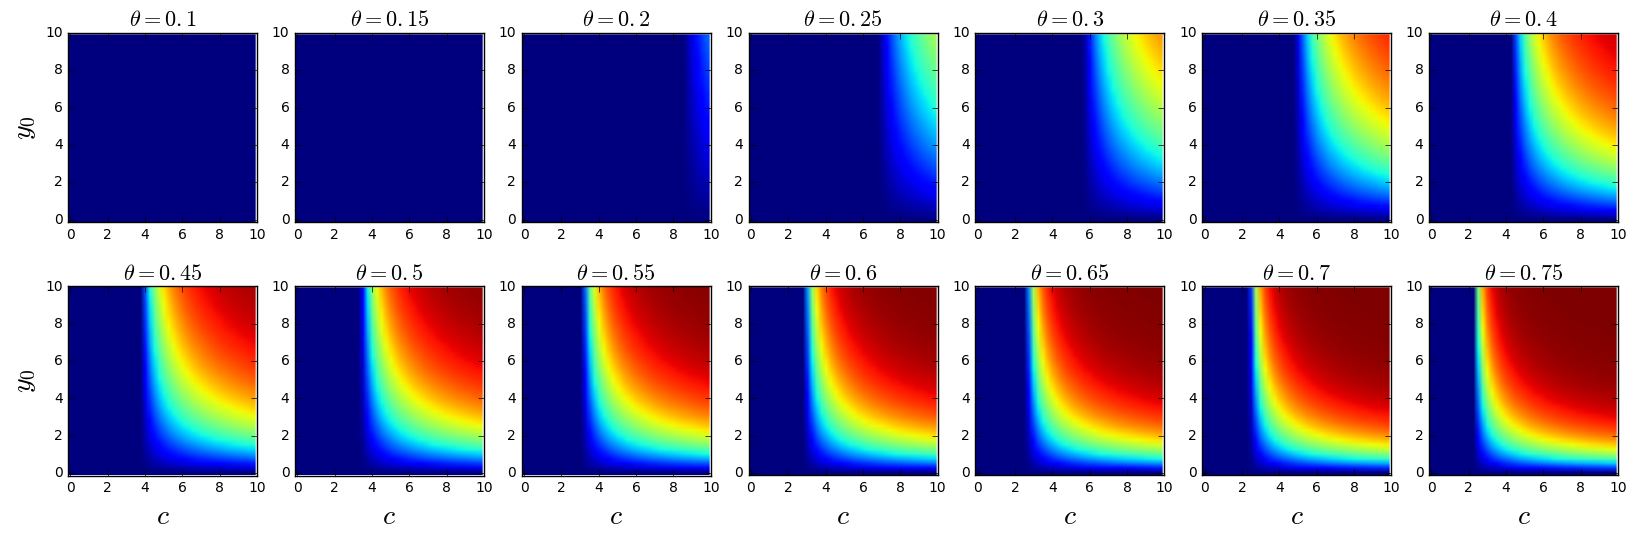

In [59]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[:, :, i], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$\\theta = {}$'.format(round(price_multiplier[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

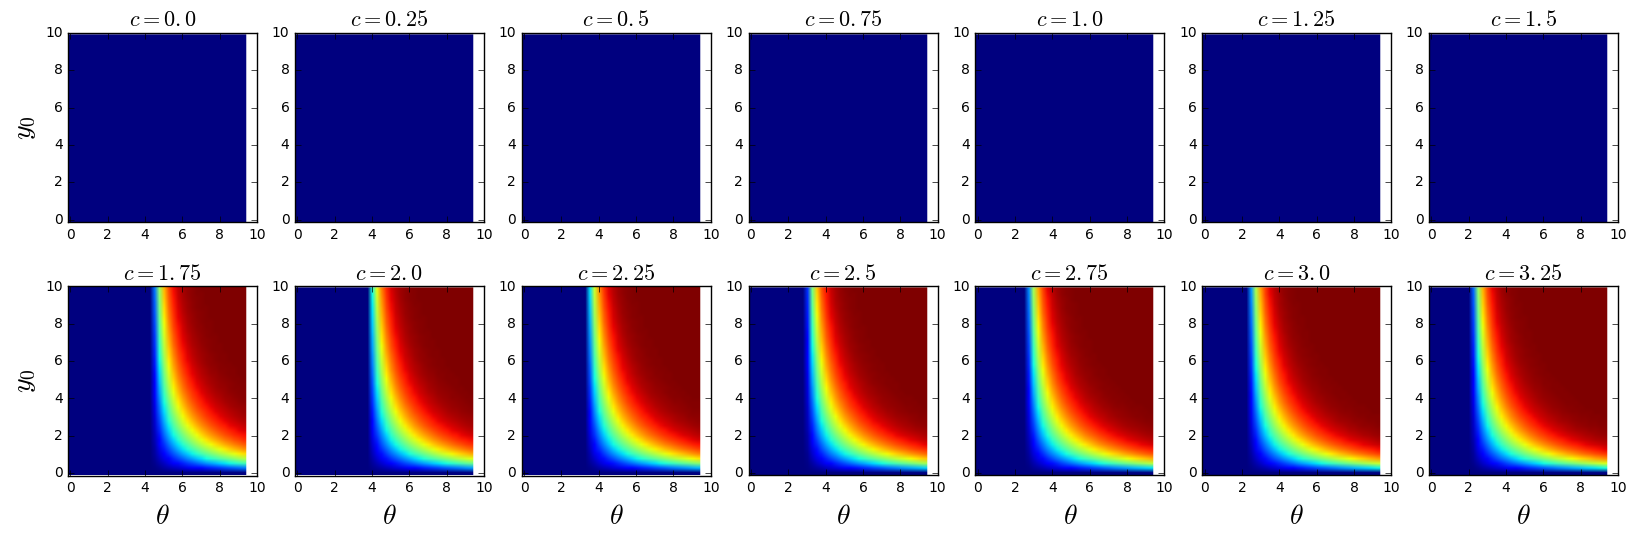

In [205]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[:, i ,:], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$c = {}$'.format(round(contributions_rate[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

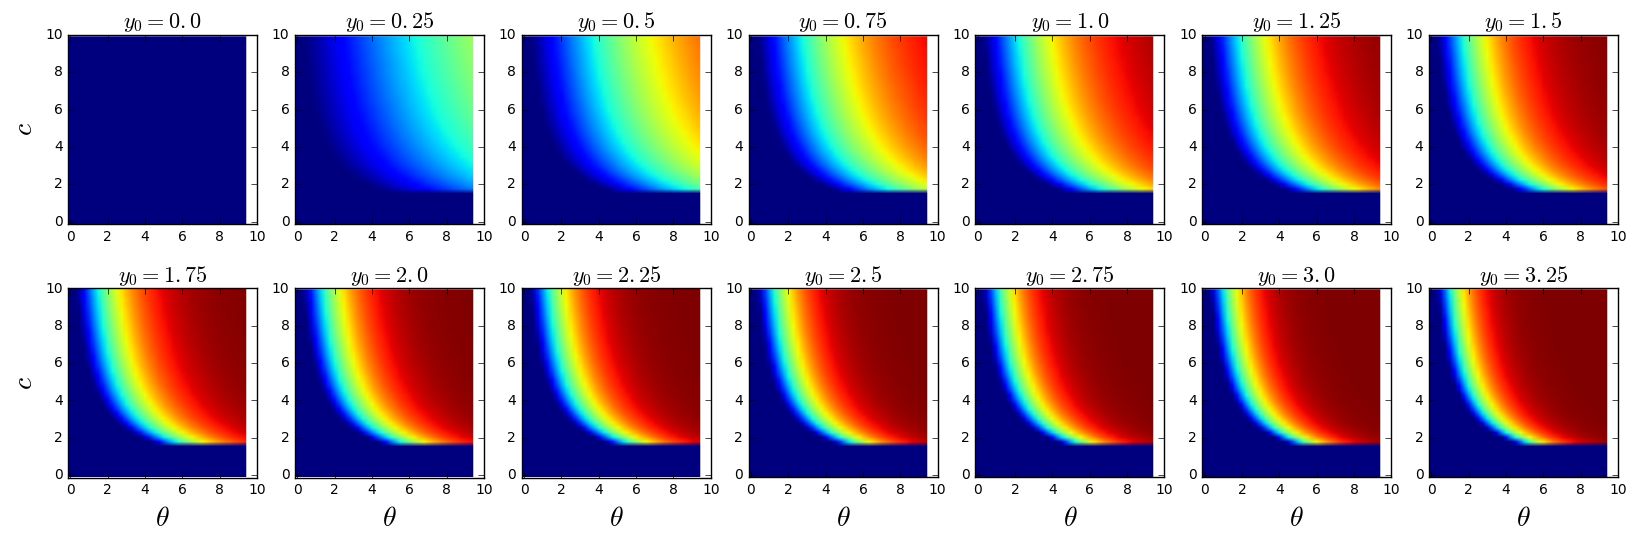

In [61]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[i, :,:], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$c$', fontsize=20)
    plt.title('$y_0 = {}$'.format(round(start_capital[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

Постройте точно такие же графики, фиксируя две другие координаты. Верно ли вы предположили поведение данной функции?

 Да)
 

Давайте теперь найдем параметры, которые дают максимум нашей функции полезности. Функция argmax в numpy выдаст нам индекс максимума, растянув перед этим нашу трехмерную матрицу в вектор. Поэтому для нахождения индексов пользуйтей следующей функцией.

In [62]:
def cool_argmax(array):
    indexs = np.unravel_index(np.argmax(array), array.shape)
    return indexs

Найдите параметры, дающие максимум функции полезности.

In [63]:
len (price_multiplier)

38

In [64]:
indexs = cool_argmax(utility_values)
print(indexs)

print('y_0 = %.2f, c = %.2f, \\theta = %.2f, u(y_0, c, \\theta) = %.2f' \
      % (start_capital[indexs[0]], contributions_rate[indexs[1]],
         price_multiplier[indexs[2]], utility_values[indexs]))

(39, 39, 37)
y_0 = 9.75, c = 9.75, \theta = 1.95, u(y_0, c, \theta) = 1.00


Получили, что максимум функции полезности достигается при максимальных параметрах.
Было бы странно, если бы получилось что-то иное.
Однако такое нас не устраивает.
Ведь если мы будем требовать много денег с клиентов и будем мало им платить, то у нас клиентов не будет вообще.

Введем некоторые ограничения на параметры.
Естественно, можно ввести ограничения сверху на каждый из параметров.
Однако давайте не будем жадными и введем некоторые линейные ограничения вида
$$\alpha_1 y_0 + \alpha_2 c + \alpha_3 \theta \leqslant \alpha_4$$

**Вопрос:** Какие положительные числа $\alpha_i$ можно выбрать в данной задаче?
Хочется увидеть творческий подход.

<Ответ>

Ниже приведен пример выставления линейных ограничений.

In [65]:
good_set = start_capital.reshape((-1, 1, 1)) \
            + contributions_rate.reshape((1, -1, 1)) \
            + 4 * price_multiplier.reshape((1, 1, -1)) <= 10
utility_values_good = utility_values * good_set

Нарисуйте графики функции полезности с ограничениями аналогично тому, как мы это делали выше.
Найдите параметры, при которых достигается максимум функции полезности при условии заданных ограничений, и само значение функции полезности.

Чем хороши такие линейные ограничения?

Введем понятие предельной нормы замещения
$$MRS_{ij} (x) = \frac{dx_i}{dx_j},$$
которое имеет смысл количества блага $j$, которое потребитель готов взять в обмен на единицу блага $i$, чтобы остаться на той же самой кривой безразличия.
Пусть $x^* = (y_0^*, c^*, \theta^*)$ --- точка условного максимума функции полезности при линейных ограничениях.
Тогда $$\left|MRS_{ij} (x)\right| = \frac{\alpha_i}{\alpha_j}$$

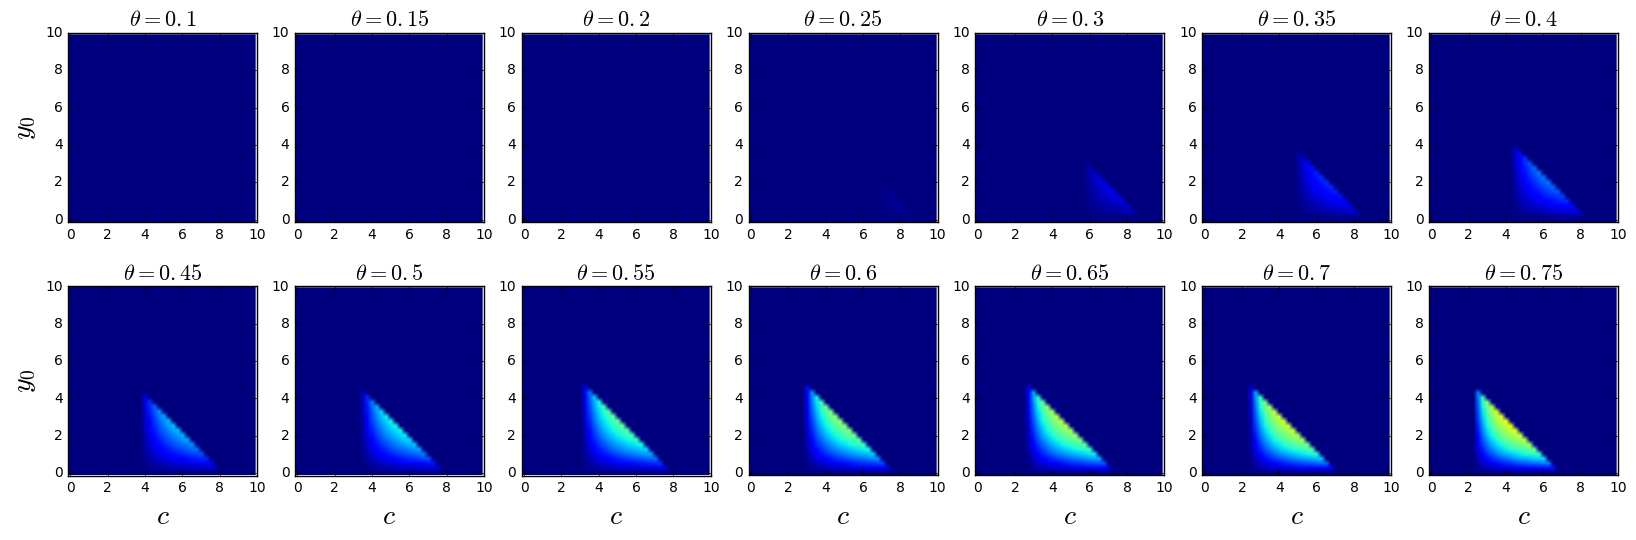

In [67]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[:, :, i], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$\\theta = {}$'.format(round(price_multiplier[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

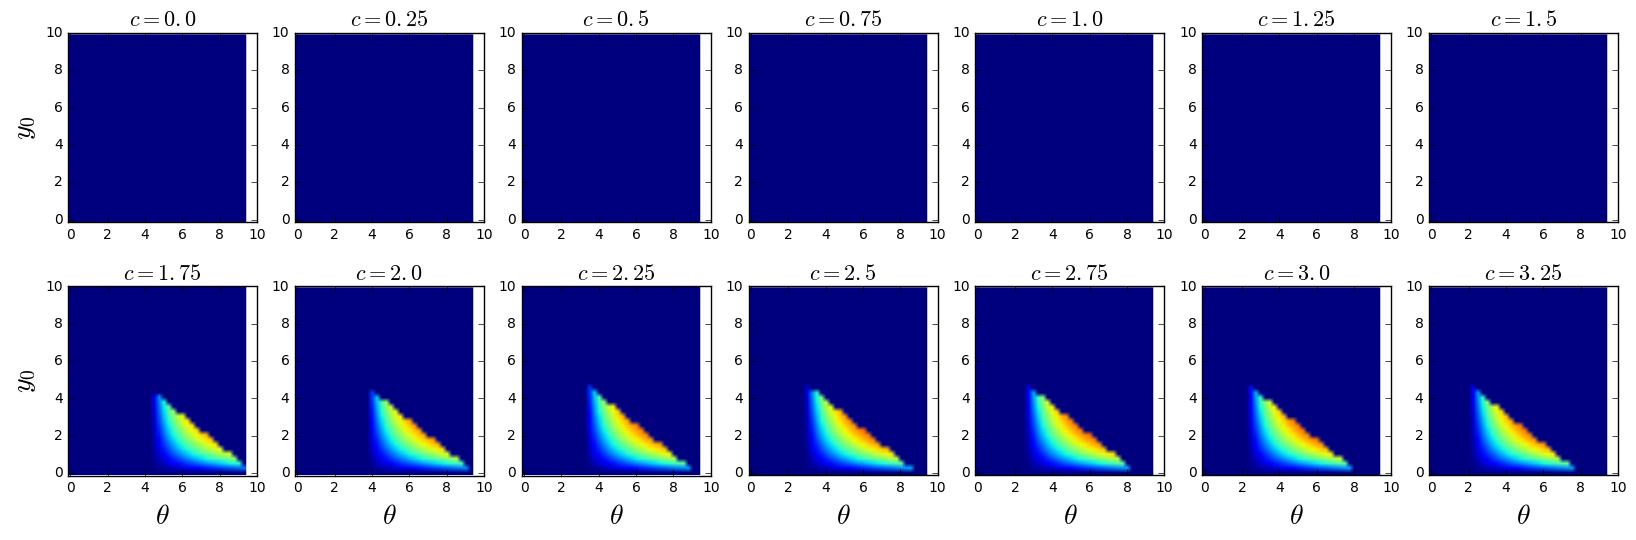

In [68]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[:, i ,:], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$c = {}$'.format(round(contributions_rate[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

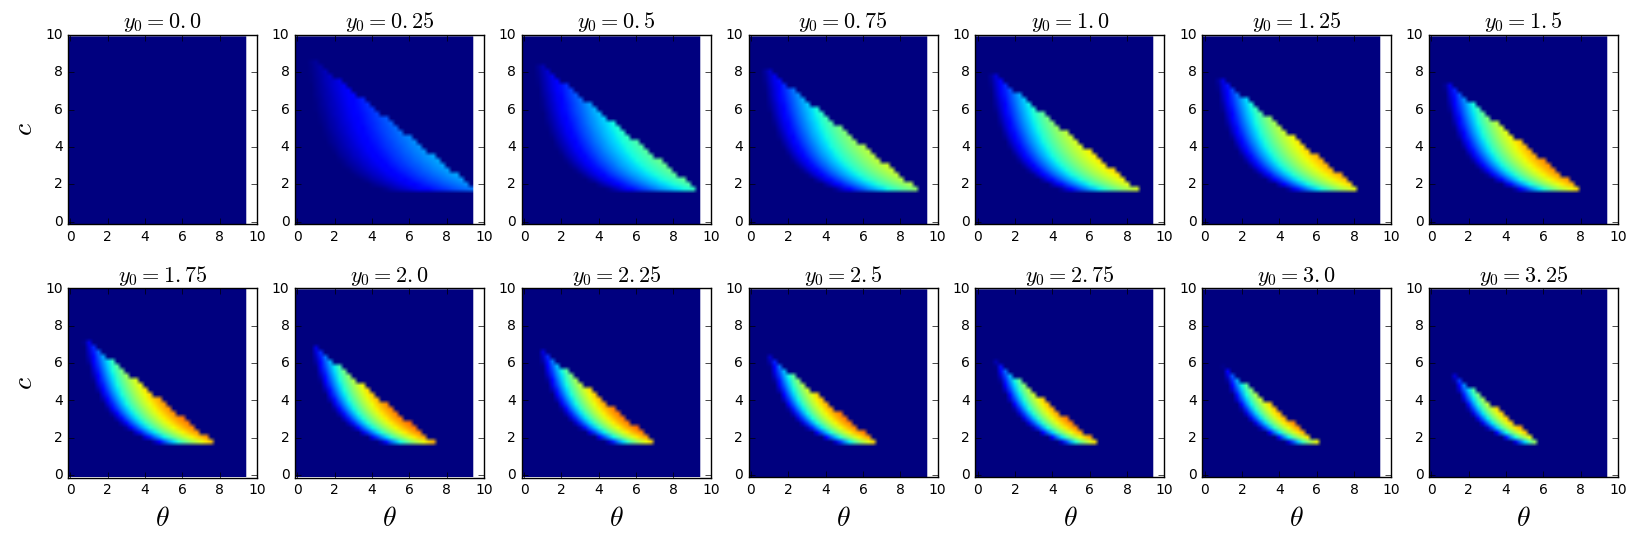

In [70]:
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[i, :,:], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$c$', fontsize=20)
    plt.title('$y_0 = {}$'.format(round(start_capital[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

Теперь реализуйте функцию, которая будем моделировать процесс $Y_t$ в соответствии с шаблоном ниже.

### Часть 1

$$Y_t = y_0 + ct - \sum_{k=1}^{N_t} \eta_k,$$

- $t > 0$ --- время
- $y_0 > 0$ --- начальный капитал
- $c > 0$ --- скорость поступления страховых взносов
- $\eta_i$ --- случайное количество денег, которые придется выплатить при страховом случае
- $N_t$ --- количество выплат к моменту времени $t$
- $Y_t$ --- капитал в момент времени $t$

Случайные величины $\{\eta_i\}$ являются независимыми, одинаково распределенными, невырожденными и неотрицательными, а $N_t$ --- пуассоновский процесс интенсивности $\lambda$, не зависящий от $\eta_i$ $\forall i$.

d

In [75]:
sps.norm.rvs(size=(3,2))

array([[-0.11180794,  0.51561538],
       [ 1.14751676, -0.57111541],
       [ 0.27083391, -0.97853126]])

In [189]:
sps.expon(1. / 1000).rvs()

2.071110856619383

In [190]:
def model_process(start_capital, contributions_rate, lambd, 
                  payment_distr, multiplier = 1.3, max_time=100, step=0.1):
    ''' Моделирует процесс Y_t в модели Крамера-лундберга 
    для набора времен np.arange(0, max_time, step).
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            lambd --- параметр интенсивности пуассновского процесса
            payment_distr --- распределение случайной величины \eta 
                                (соответствует распределениям scipy.stats)
    '''
    
    times = np.arange(0, max_time, step)
    sumka = 0.
    sums = [sps.expon(1. / lambd).rvs(1)]
    while sumka < max_time:
        sums.append(sps.expon(1. / lambd).rvs(1) + sums[-1])
        sumka = sums[-1]

    N_t = []
    for time in tqdm(times):
        N_t.append(np.sum([S_n <= time for S_n in sums]))
    
    print (N_t[-1])
    cumsumka = np.cumsum([0] + list(payment_distr.rvs(size = N_t[-1])))
    print (len(cumsumka))
    capital = start_capital + contributions_rate * times - np.array([cumsumka[N_t[ind]] for ind in range(len(N_t))]) / multiplier
    #np.array([np.sum(payment_distr.rvs(size=N_t[ind])) for ind in range(len(N_t))])
    
    return times, capital, N_t

Ниже показан пример задания распределения случайных величин $\eta_i$, моделирования процесса и построения графика.

100%|██████████| 1000/1000 [00:00<00:00, 8717.72it/s]


43
44


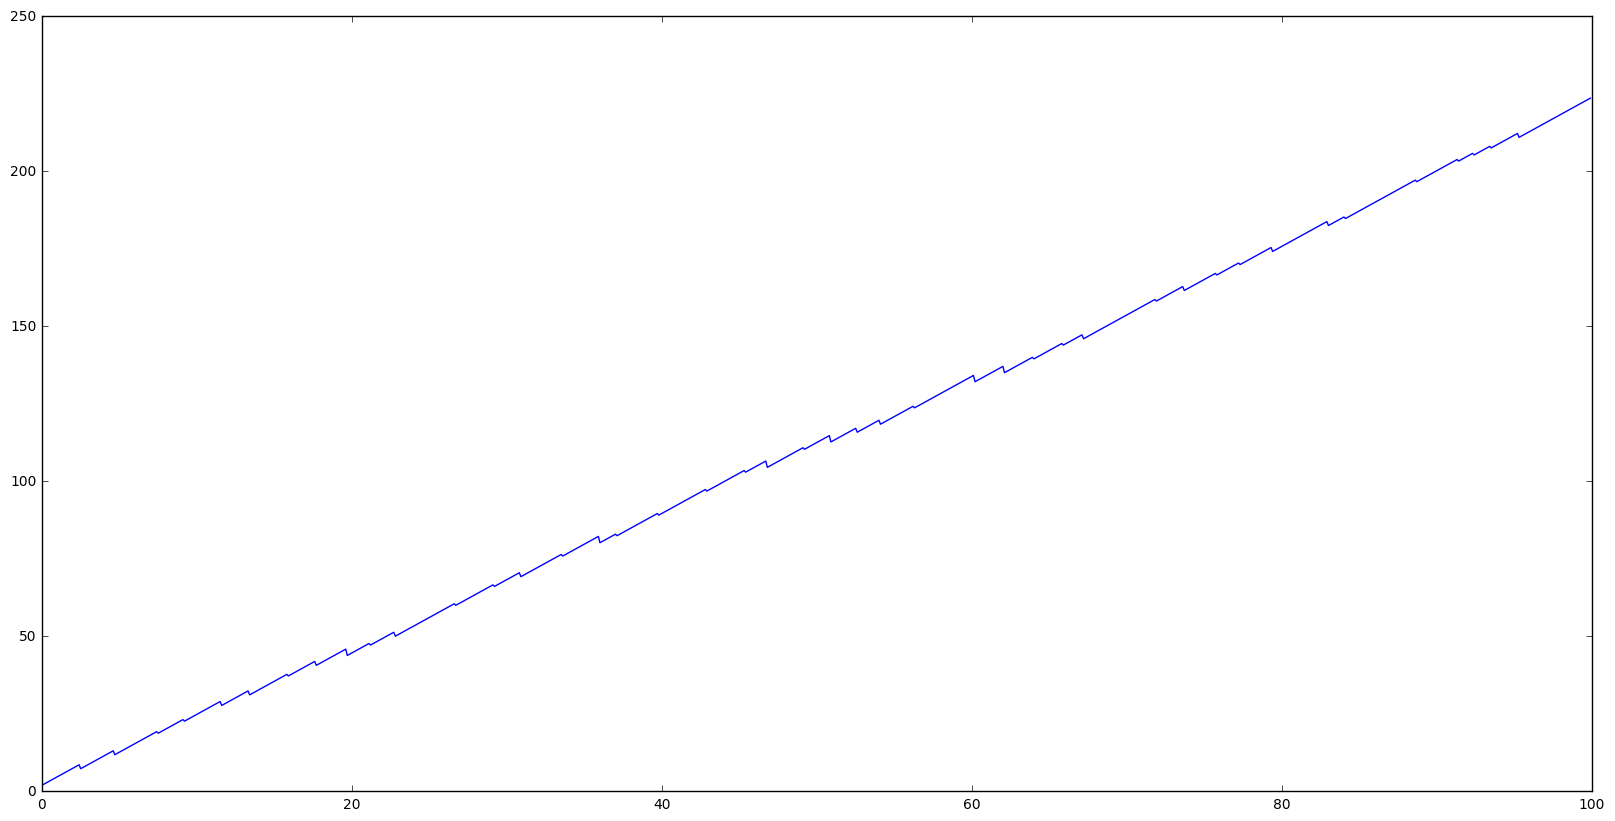

In [191]:
values = np.array([1, 2, 3])
probs = np.array([0.5, 0.3, 0.2])
payment_distr = sps.rv_discrete(name='payment_distr', 
                                values=(values, probs))
times, process, N_t = model_process(2, 2.75, 1, payment_distr)

plt.figure(figsize=(20, 10))
plt.plot(times, process)
plt.show()

In [192]:
values / 1.3

array([ 0.76923077,  1.53846154,  2.30769231])

In [193]:
payment_distr.rvs(size=100)

array([2, 1, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 3,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2,
       3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1,
       2, 2, 3, 1, 2, 1, 1, 1])

Смоделируйте процесс и постройте его график для различных параметров:
- оптимальных, которые вы получили выше
- выставив большое значение одного параметра
- выставив малое значение одного параметра

Не забудьте сделать выводы.

За выполнение первой части можно получить **3 балла**.

In [194]:
def draw_process(vals, probs, start_capital, contributions_rate, lambd, multiplier = 1.3, max_time=100, step=0.1):
    # values = np.array([1, 2, 3])
    # probs = np.array([0.5, 0.3, 0.2])
    payment_distr = sps.rv_discrete(name='payment_distr', 
                                    values=(vals, probs))
    times, process, N_t = model_process(start_capital, contributions_rate, lambd, payment_distr, multiplier)

    plt.figure(figsize=(20, 10))
    plt.plot(times, process)
    plt.show()

(39, 39, 37)
y_0 = 9.75, c = 9.75, \theta = 1.95, u(y_0, c, \theta) = 1.00

λ=1, {a1,a2,a3}={1,2,3} и {p1,p2,p3}={0.5,0.3,0.2}

100%|██████████| 1000/1000 [00:00<00:00, 5508.51it/s]


49
50


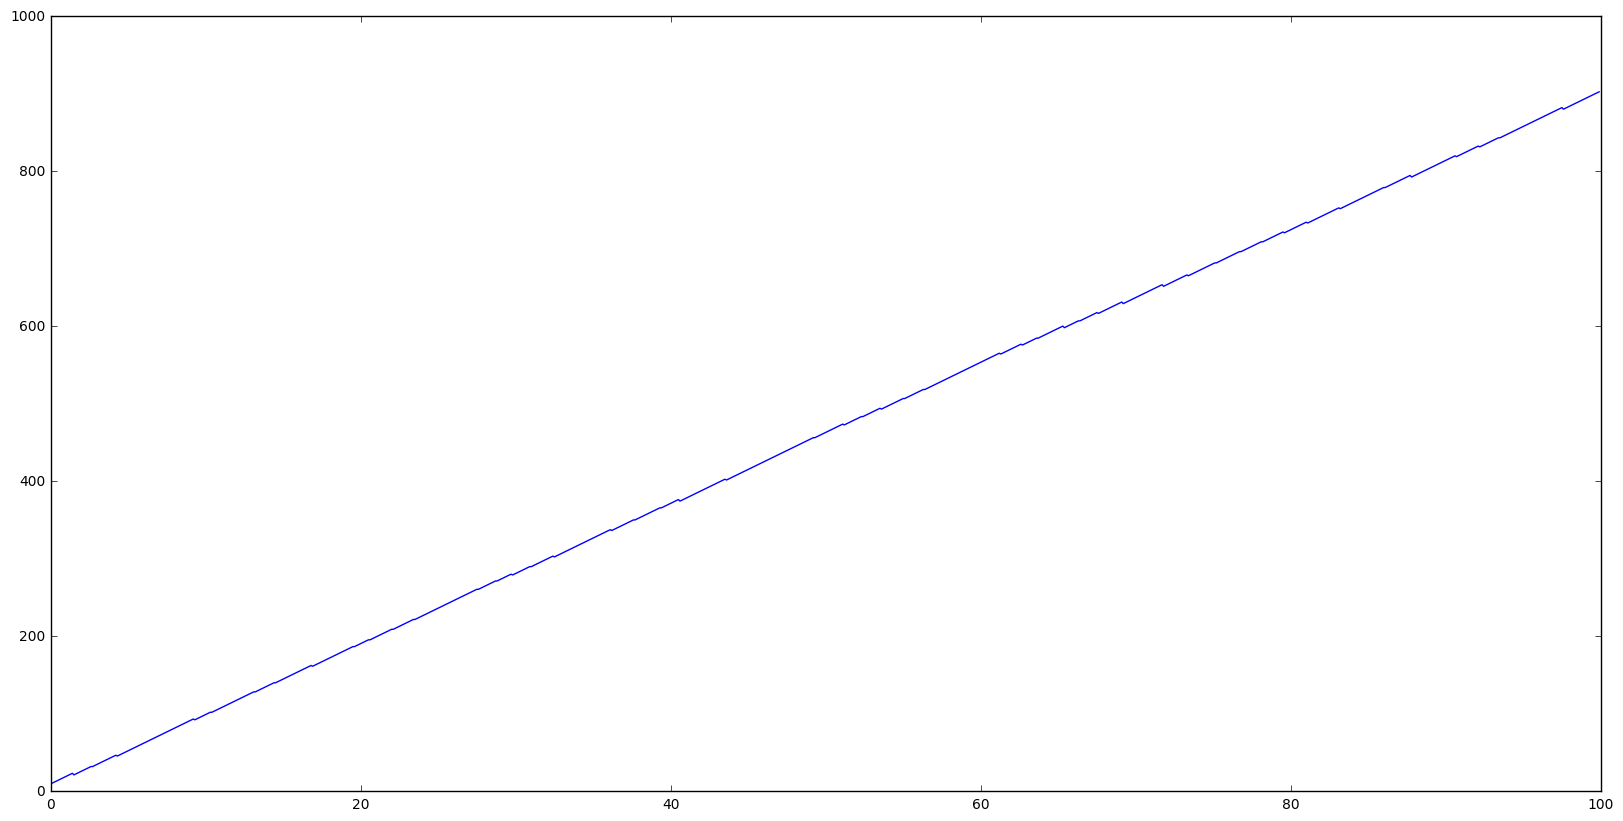

In [195]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 9.75,1, 1)

100%|██████████| 1000/1000 [00:00<00:00, 6161.51it/s]


43
44


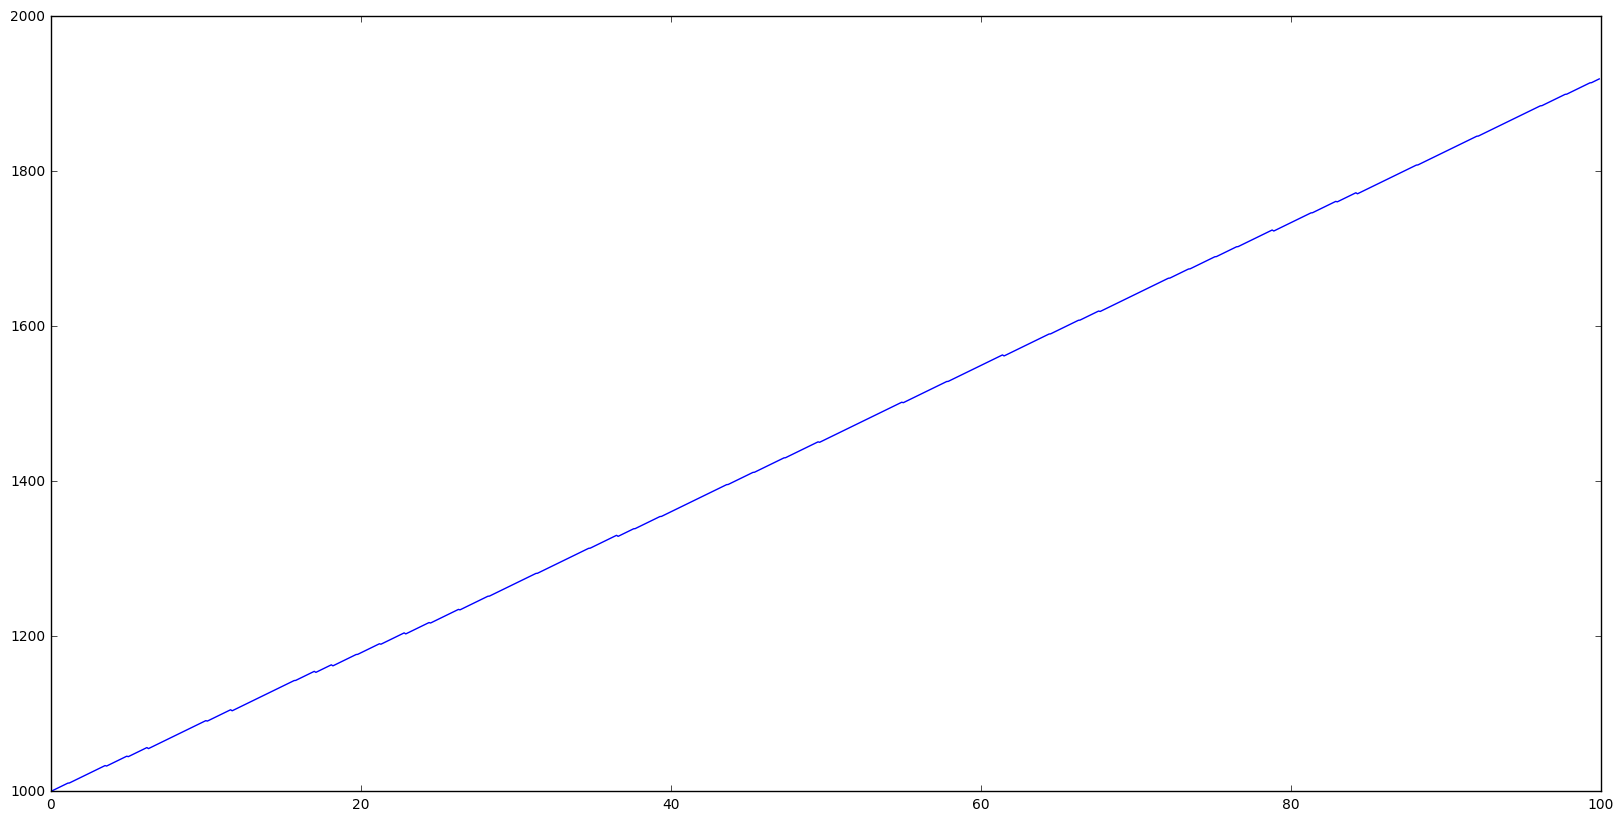

In [196]:
draw_process([1,2,3], [0.5,0.3,0.2], 1000, 9.75,1) # При росте y_0 просто растут значения

100%|██████████| 1000/1000 [00:00<00:00, 9260.46it/s]


50
51


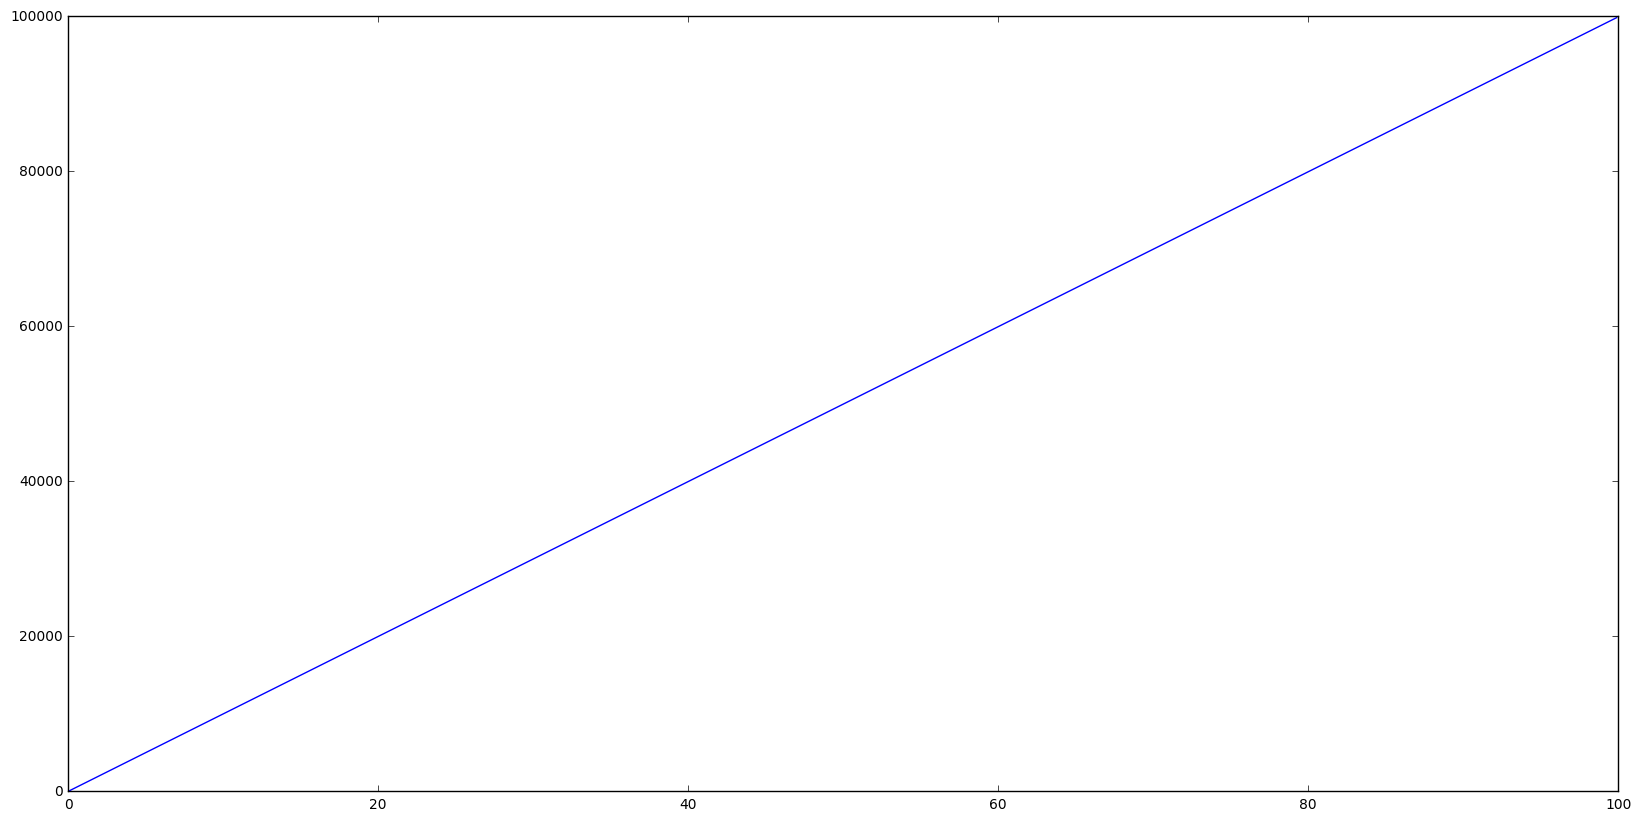

In [197]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 1000,1)  # contrib_rate влияет на гладкость нашей кривой(чем выше, тем более гладкий)

100%|██████████| 1000/1000 [00:00<00:00, 3415.53it/s]


52
53


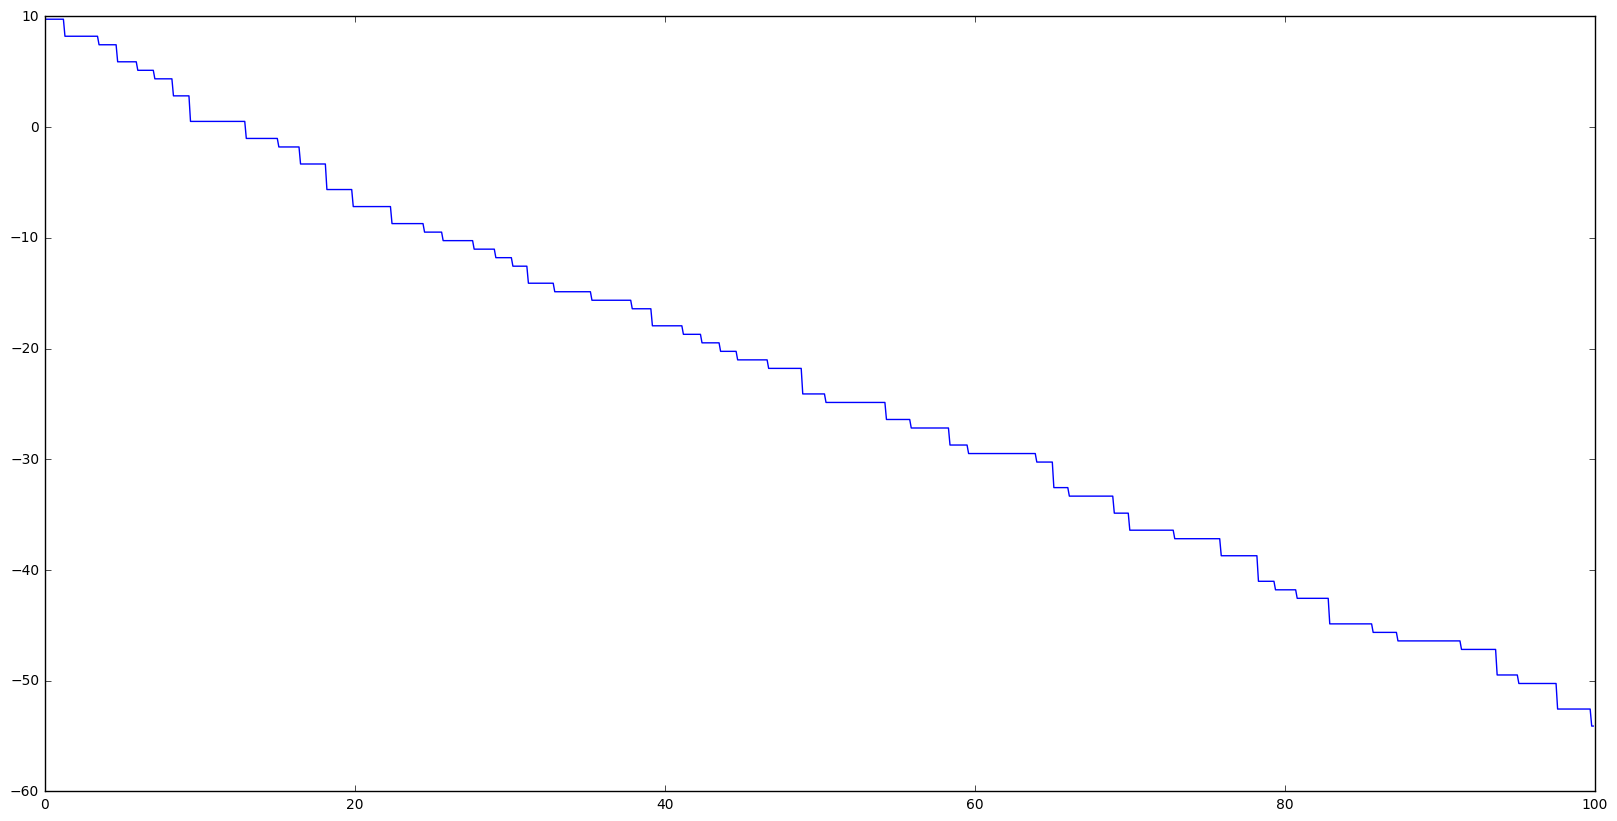

In [198]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 10 ** -5,1)  # contrib_rate влияет на гладкость нашей кривой(чем выше, тем более гладкий)

100%|██████████| 1000/1000 [00:00<00:00, 1394.51it/s]


92
93


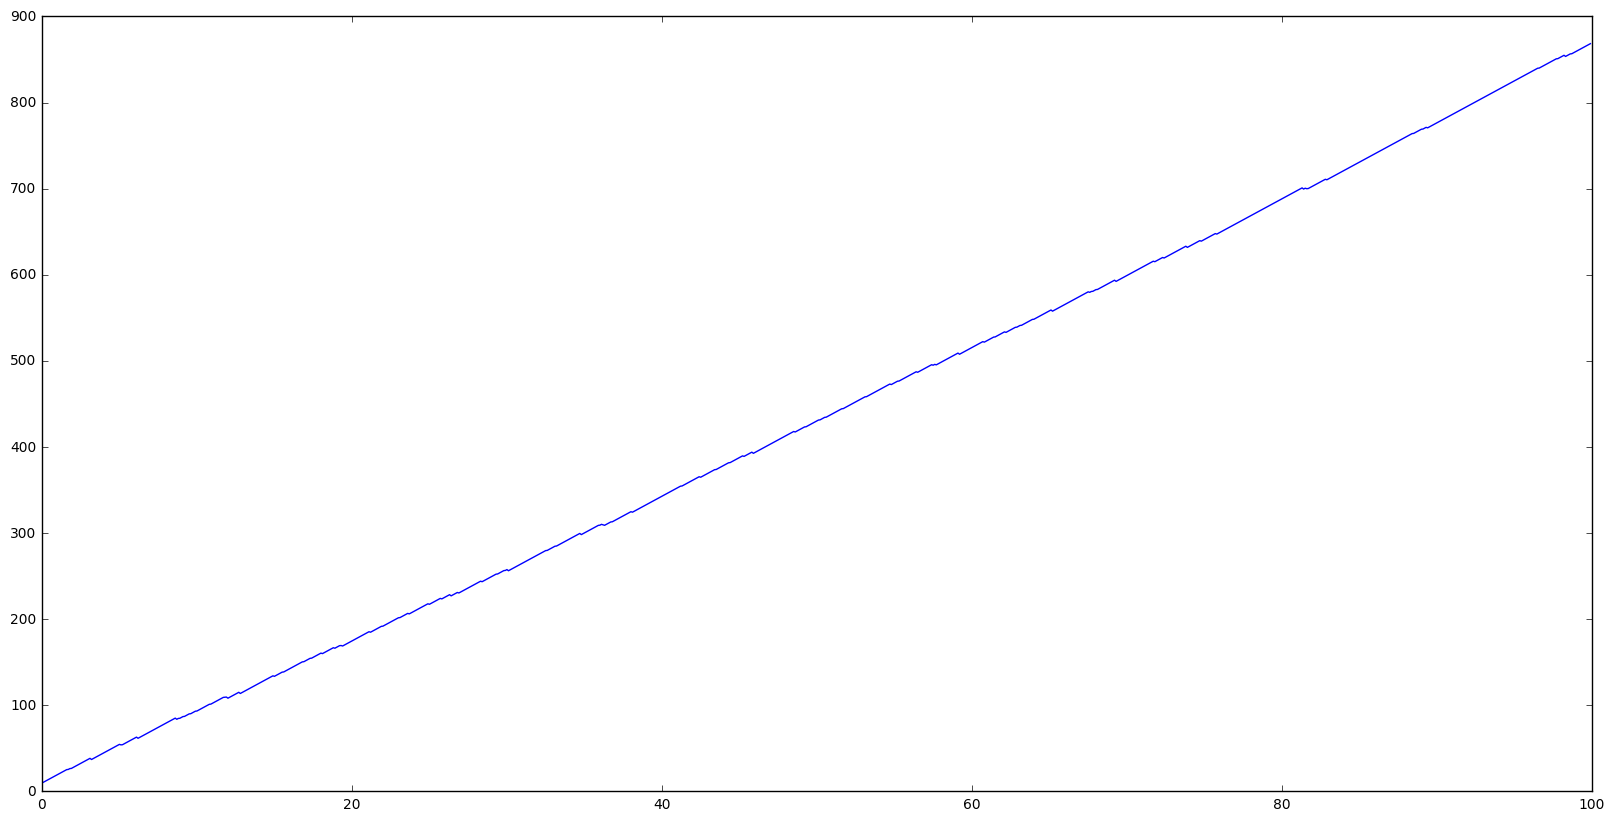

In [199]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 9.75,lambd=10000) # При росте lambda, растет и матожидание N_t

100%|██████████| 1000/1000 [00:00<00:00, 5948.59it/s]


52
53


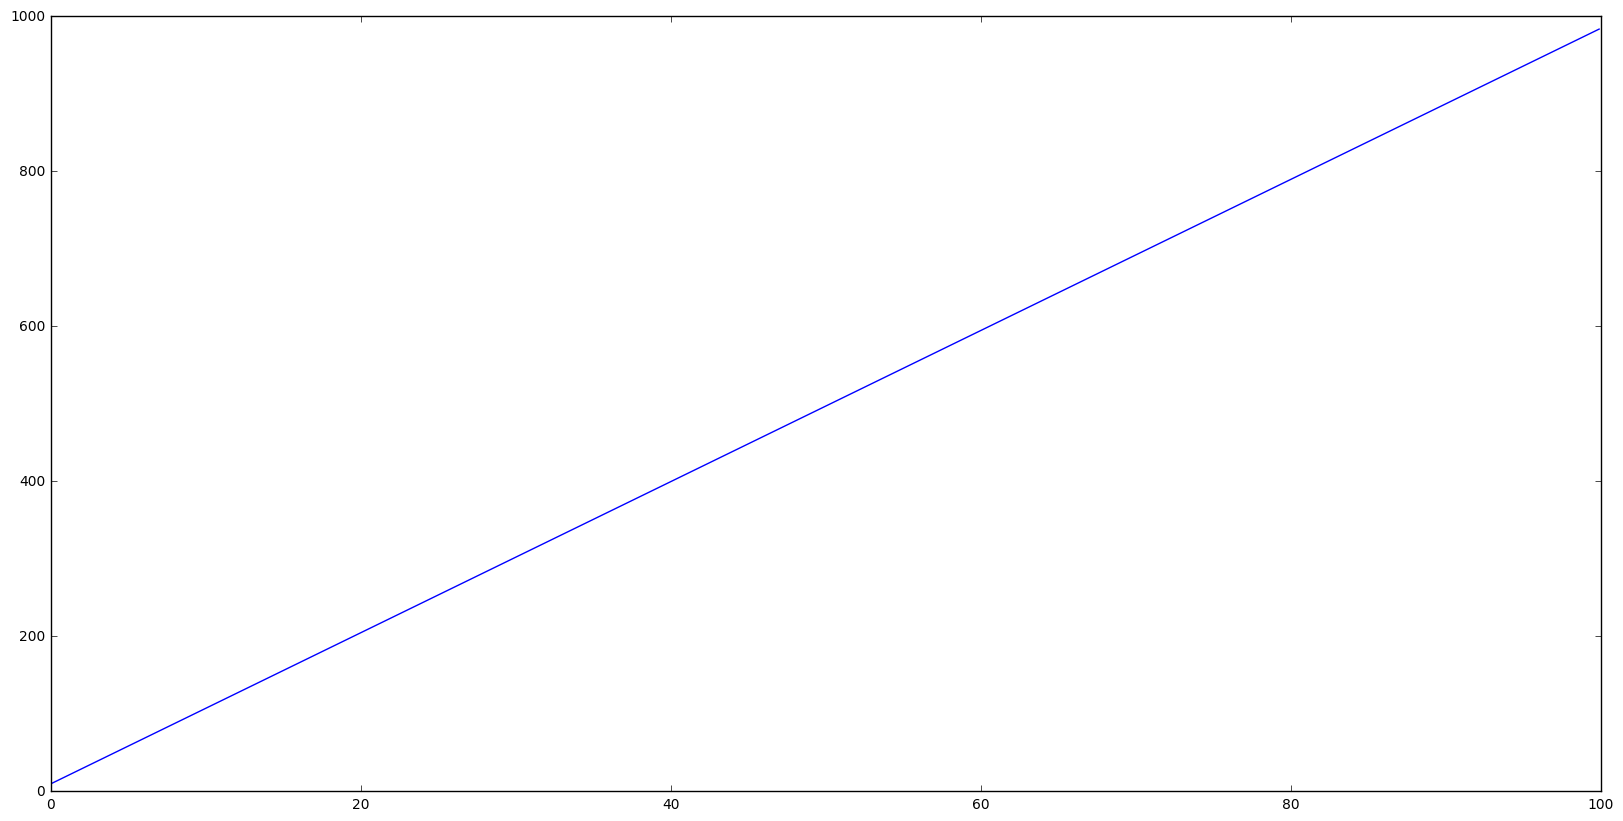

In [202]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 9.75,1, 1000) # при росте theta уменьшаются значения выплат -> больше денег у нас остается

100%|██████████| 1000/1000 [00:00<00:00, 2721.27it/s]


86
87


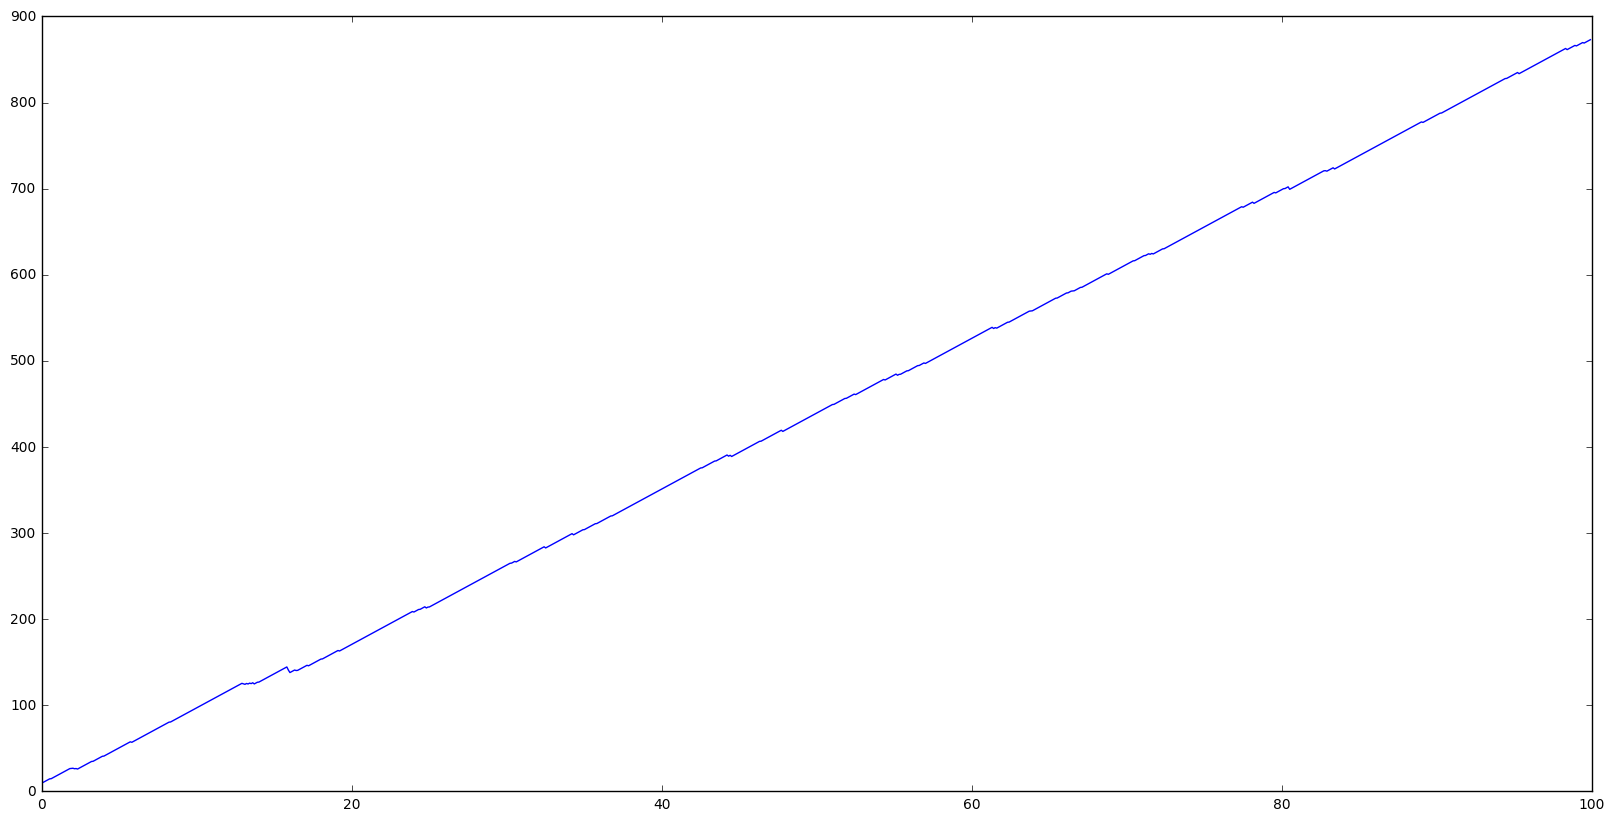

In [201]:
draw_process([1,2,3], [0.5,0.3,0.2], 9.75, 9.75,1000)

### Часть 2

Пусть в некоторый момент времени капитал достиг уровня $y_1$.
Обозначим его $\tau = \inf \{ t\ \left|\ Y_t \geqslant y_1\right.\}$.
С практической точки зрения страховой компании может быть интересен вопрос об оценке сверху на математическое ожидание этого момента времени, чтобы понять, сколько нужно ждать до того момента, когда компания сможет заработать много денег.

На семинарах 494 группы мы показали, что он является моментом остановки относительно естественной фильтрации процесса $Y_t$.
Также на семинаре были выведены следующие оценки сверху на его математическое ожидание

1). Оценка имени Степана Каргальцева
$$\mathsf{E} \tau \leqslant \frac{v_1 (y_1 - y_0)}{-g(v_1)},$$
где $v_1 = \mathop{\rm arg\,max}\limits_v g(v)$ --- единственная точка минимума функции $g(v)$ на положительной полуоси.

2).
$$\mathsf{E} \tau \leqslant \min_{v:\ g(v) < 0} \frac{e^{v (y_1 - y_0)}}{-g(v)}$$

------

#### 1. (2 балла)
Теперь вам предстоит проверить, насколько точны эти оценки.
Для этого для разных параметров сгенерируйте достаточно большое количество траекторий, найдя для каждой из них значение $\tau$. Это позволит получить выборку и сделать оценку на $\mathsf{E} \tau$.

В каких случаях какие приведенные выше верхние оценки дают более точный результат? Насколько точный?


#### 2. (2 балла)
Допустим, мы достигли момента времени $\tau$. Теперь наша компания богата, и нам не так страшно разориться. Может быть, стоит снизить цену страховых взносов (параметр $c$)? Или же увеличить цену страховых выплат (уменьшить параметр $\theta$).
Выясните это, посчитав значения нашей функции полезности при фиксированном $y_1$.
Проведите моделирование процессов, изменяя параметры при достижении момента времени $\tau$, и постройте графики процессов.